# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.


In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Exercises

**Required Exercises**

| Section | Part                                           | Function                    
|---------|:-                                              |:-                                         
| 1       | [Warm up exercise](#section1)                  | [`warmUpExercise`](#warmUpExercise)      
| 2       | [Compute cost for one variable](#section2)     | [`computeCost`](#computeCost)           
| 3       | [Gradient descent for one variable](#section3) | [`gradientDescent`](#gradientDescent)     

**Optional Exercises**

| Section | Part                                                 | Function 
|:-------:|:-                                                    |:-                 
| 4       | [Feature normalization](#section4)                   | [`featureNormalize`](#featureNormalize)      
| 5       | [Compute cost for multiple variables](#section5)     | [`computeCostMulti`](#computeCostMulti)      
| 6       | [Gradient descent for multiple variables](#section5) | [`gradientDescentMulti`](#gradientDescentMulti) 
| 7       | [Normal Equations](#section7)                        | [`normalEqn`](#normalEqn)         


## Debugging

Here are some things to keep in mind throughout this exercise:

- Python array indices start from zero, not one. 

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

The first part of this assignment gives you practice with python and `numpy` syntax. In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [2]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = []   

    A=np.eye(5)
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

In [4]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. There are many plotting libraries in python (see this [blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/) for a good summary of the most popular ones). 

In this course, we will be exclusively using `matplotlib` to do all our plotting. `matplotlib` is one of the most popular scientific plotting libraries in python and has extensive tools and functions to make beautiful plots. `pyplot` is a module within `matplotlib` which provides a simplified interface to `matplotlib`'s most common plotting tasks, mimicking MATLAB's plotting interface.

In the following part, your first job is to complete the `plotData` function below. Modify the function and fill in the following code:

```python
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [5]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure(figsize=(16.18,10.00))  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    
    
    
    
    
    # =============================================================


Now run the defined function with the loaded data to visualize the data. The end result should look like the following figure:

![](Figures/dataset1.png)

Execute the next cell to visualize the data.

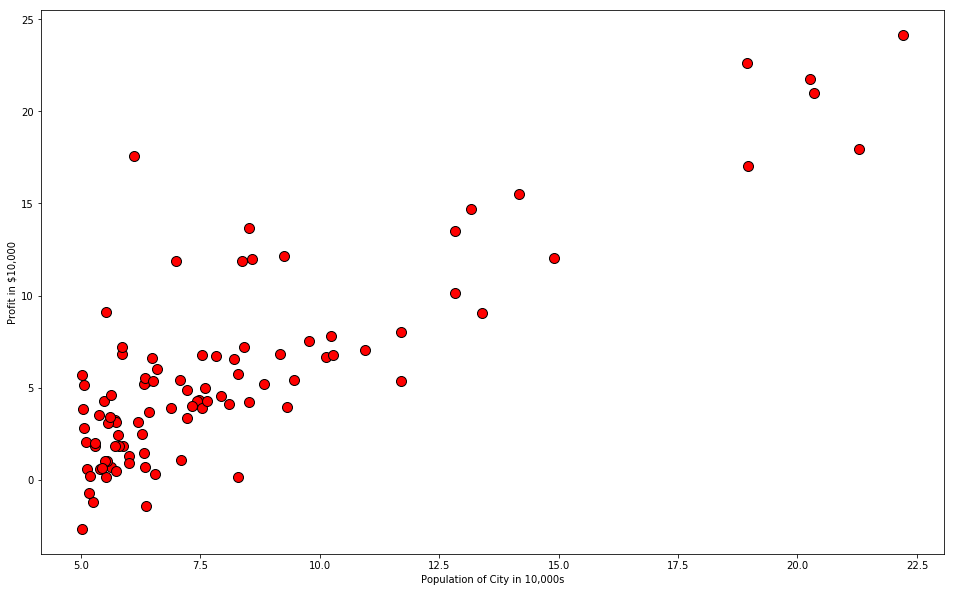

In [6]:
plotData(X, y)

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.


#### 2.2.1 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [7]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).

# Assert raises an exception if the cell is run again without initializing X.
assert X.shape == (97,), "X already contains a stack ones."

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0.0
    
    # ====================== YOUR CODE HERE =====================

    for i in range(m):
        J=J+((1/(2*m))*pow((theta[0]+(theta[1]*X[i][1])-y[i]),2))
    
    # ===========================================================
    return J

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [9]:
J1 = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J1)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J2 = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J2)
print('Expected cost value (approximately) 54.24\n')

limit1 = 1.2
est_Error1 = abs(J1 - 32) + abs(J2 - 54)

if(est_Error1 <= limit1) : 
    print("Great work! You may proceed.")
else :
    print("You may want to check your implementation.")
    print("[Estimated error : %.2f]" % est_Error1)
    assert False, "******* Results don't match. *******"
    

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24

Great work! You may proceed.


<a id="section3"></a>
#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) and to the video lectures if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration

    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        h = np.dot(X, theta)
     

     
        #theta[0]=theta[0]-(alpha/m)*(np.sum(h-y))
        #theta[1]=theta[1]-(alpha/m)*(np.dot(X.T,h-y))[1]
        
        theta=theta-(alpha/m)*(np.dot(X.T,h-y))
        print (theta)
        
        
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    print("----------------------------------------------------\n")
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01.

In [12]:
# Initialize fitting parameters
theta = np.zeros(2)

# Model hyperparameters. 
# # ==================== YOUR CODE HERE =================================
# Feel free to change these if they don't seem to working.

alpha = 0.01
iterations = 150000

# QUESTION : What is the largest 'alpha' and smallest 'iterations' you can get away with ?

# =====================================================================

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

[0.05839135 0.6532885 ]
[0.06289175 0.77000978]
[0.05782293 0.79134812]
[0.05106363 0.79572981]
[0.04401438 0.79709618]
[0.03692413 0.79792547]
[0.02983712 0.79865824]
[0.02276118 0.79937279]
[0.0156977  0.80008305]
[0.0086469 0.8007915]
[0.00160879 0.80149857]
[-0.00541662  0.80220436]
[-0.01242938  0.80290886]
[-0.01942949  0.8036121 ]
[-0.02641699  0.80431407]
[-0.03339189  0.80501478]
[-0.04035421  0.80571422]
[-0.04730399  0.8064124 ]
[-0.05424124  0.80710932]
[-0.06116598  0.80780498]
[-0.06807824  0.8084994 ]
[-0.07497804  0.80919256]
[-0.08186541  0.80988447]
[-0.08874035  0.81057513]
[-0.09560291  0.81126455]
[-0.10245309  0.81195272]
[-0.10929093  0.81263966]
[-0.11611644  0.81332535]
[-0.12292965  0.81400981]
[-0.12973057  0.81469304]
[-0.13651924  0.81537504]
[-0.14329567  0.8160558 ]
[-0.15005988  0.81673534]
[-0.15681191  0.81741365]
[-0.16355176  0.81809075]
[-0.17027946  0.81876662]
[-0.17699503  0.81944127]
[-0.1836985  0.8201147]
[-0.19038988  0.82078693]
[-0.1970692 

[-2.8054012   1.08349318]
[-2.80736672  1.08369064]
[-2.80932869  1.08388774]
[-2.81128712  1.08408448]
[-2.81324202  1.08428087]
[-2.8151934   1.08447691]
[-2.81714127  1.0846726 ]
[-2.81908562  1.08486793]
[-2.82102646  1.08506291]
[-2.82296381  1.08525753]
[-2.82489767  1.08545181]
[-2.82682804  1.08564574]
[-2.82875493  1.08583931]
[-2.83067834  1.08603254]
[-2.83259829  1.08622542]
[-2.83451478  1.08641795]
[-2.83642782  1.08661014]
[-2.8383374   1.08680198]
[-2.84024354  1.08699347]
[-2.84214625  1.08718462]
[-2.84404553  1.08737542]
[-2.84594138  1.08756588]
[-2.84783382  1.087756  ]
[-2.84972284  1.08794577]
[-2.85160846  1.0881352 ]
[-2.85349068  1.08832429]
[-2.85536951  1.08851304]
[-2.85724495  1.08870145]
[-2.85911701  1.08888951]
[-2.8609857   1.08907724]
[-2.86285102  1.08926464]
[-2.86471297  1.08945169]
[-2.86657157  1.08963841]
[-2.86842682  1.08982479]
[-2.87027872  1.09001083]
[-2.87212729  1.09019654]
[-2.87397252  1.09038191]
[-2.87581443  1.09056695]
[-2.87765302

[-3.64427952  1.1677676 ]
[-3.64473288  1.16781315]
[-3.64518541  1.16785861]
[-3.64563714  1.16790399]
[-3.64608804  1.16794929]
[-3.64653814  1.16799451]
[-3.64698742  1.16803964]
[-3.6474359  1.1680847]
[-3.64788356  1.16812967]
[-3.64833042  1.16817456]
[-3.64877647  1.16821937]
[-3.64922172  1.1682641 ]
[-3.64966617  1.16830875]
[-3.65010982  1.16835332]
[-3.65055266  1.16839781]
[-3.65099471  1.16844222]
[-3.65143596  1.16848655]
[-3.65187641  1.1685308 ]
[-3.65231608  1.16857496]
[-3.65275494  1.16861905]
[-3.65319302  1.16866306]
[-3.65363031  1.16870699]
[-3.65406681  1.16875084]
[-3.65450252  1.16879462]
[-3.65493745  1.16883831]
[-3.65537159  1.16888192]
[-3.65580495  1.16892546]
[-3.65623753  1.16896892]
[-3.65666933  1.1690123 ]
[-3.65710035  1.1690556 ]
[-3.6575306   1.16909882]
[-3.65796007  1.16914196]
[-3.65838876  1.16918503]
[-3.65881668  1.16922802]
[-3.65924384  1.16927093]
[-3.65967022  1.16931377]
[-3.66009583  1.16935652]
[-3.66052067  1.1693992 ]
[-3.66094475  

[-3.84592877  1.18802546]
[-3.84601863  1.18803449]
[-3.84610833  1.1880435 ]
[-3.84619787  1.18805249]
[-3.84628725  1.18806147]
[-3.84637647  1.18807044]
[-3.84646552  1.18807938]
[-3.84655442  1.18808831]
[-3.84664315  1.18809723]
[-3.84673173  1.18810613]
[-3.84682014  1.18811501]
[-3.8469084   1.18812387]
[-3.8469965   1.18813272]
[-3.84708444  1.18814156]
[-3.84717222  1.18815038]
[-3.84725984  1.18815918]
[-3.8473473   1.18816797]
[-3.84743461  1.18817674]
[-3.84752176  1.18818549]
[-3.84760875  1.18819423]
[-3.84769558  1.18820295]
[-3.84778226  1.18821166]
[-3.84786878  1.18822035]
[-3.84795515  1.18822903]
[-3.84804136  1.18823769]
[-3.84812742  1.18824634]
[-3.84821332  1.18825497]
[-3.84829906  1.18826358]
[-3.84838465  1.18827218]
[-3.84847009  1.18828076]
[-3.84855537  1.18828933]
[-3.8486405   1.18829788]
[-3.84872547  1.18830642]
[-3.8488103   1.18831494]
[-3.84889496  1.18832345]
[-3.84897948  1.18833194]
[-3.84906384  1.18834041]
[-3.84914806  1.18834887]
[-3.84923212

[-3.88638609  1.19208984]
[-3.88640303  1.19209154]
[-3.88641993  1.19209324]
[-3.8864368   1.19209493]
[-3.88645365  1.19209662]
[-3.88647046  1.19209831]
[-3.88648724  1.1921    ]
[-3.886504    1.19210168]
[-3.88652072  1.19210336]
[-3.88653741  1.19210504]
[-3.88655407  1.19210671]
[-3.88657071  1.19210838]
[-3.88658731  1.19211005]
[-3.88660388  1.19211172]
[-3.88662042  1.19211338]
[-3.88663693  1.19211504]
[-3.88665342  1.19211669]
[-3.88666987  1.19211834]
[-3.88668629  1.19211999]
[-3.88670269  1.19212164]
[-3.88671905  1.19212329]
[-3.88673539  1.19212493]
[-3.88675169  1.19212656]
[-3.88676797  1.1921282 ]
[-3.88678422  1.19212983]
[-3.88680043  1.19213146]
[-3.88681662  1.19213309]
[-3.88683278  1.19213471]
[-3.88684891  1.19213633]
[-3.88686501  1.19213795]
[-3.88688108  1.19213956]
[-3.88689712  1.19214117]
[-3.88691314  1.19214278]
[-3.88692912  1.19214439]
[-3.88694508  1.19214599]
[-3.88696101  1.19214759]
[-3.88697691  1.19214919]
[-3.88699278  1.19215078]
[-3.88700862

[-3.89395196  1.19284991]
[-3.89395526  1.19285024]
[-3.89395855  1.19285057]
[-3.89396183  1.1928509 ]
[-3.89396511  1.19285123]
[-3.89396838  1.19285156]
[-3.89397165  1.19285189]
[-3.89397491  1.19285222]
[-3.89397817  1.19285254]
[-3.89398142  1.19285287]
[-3.89398466  1.19285319]
[-3.8939879   1.19285352]
[-3.89399113  1.19285384]
[-3.89399436  1.19285417]
[-3.89399758  1.19285449]
[-3.89400079  1.19285482]
[-3.894004    1.19285514]
[-3.8940072   1.19285546]
[-3.8940104   1.19285578]
[-3.89401359  1.1928561 ]
[-3.89401678  1.19285642]
[-3.89401996  1.19285674]
[-3.89402313  1.19285706]
[-3.8940263   1.19285738]
[-3.89402946  1.1928577 ]
[-3.89403262  1.19285801]
[-3.89403577  1.19285833]
[-3.89403892  1.19285865]
[-3.89404206  1.19285896]
[-3.89404519  1.19285928]
[-3.89404832  1.19285959]
[-3.89405144  1.1928599 ]
[-3.89405456  1.19286022]
[-3.89405767  1.19286053]
[-3.89406078  1.19286084]
[-3.89406388  1.19286115]
[-3.89406698  1.19286146]
[-3.89407006  1.19286177]
[-3.89407315

[-3.89534589  1.19298994]
[-3.89534667  1.19299002]
[-3.89534746  1.1929901 ]
[-3.89534824  1.19299018]
[-3.89534902  1.19299026]
[-3.8953498   1.19299034]
[-3.89535057  1.19299042]
[-3.89535135  1.19299049]
[-3.89535212  1.19299057]
[-3.8953529   1.19299065]
[-3.89535367  1.19299073]
[-3.89535444  1.1929908 ]
[-3.89535521  1.19299088]
[-3.89535597  1.19299096]
[-3.89535674  1.19299103]
[-3.8953575   1.19299111]
[-3.89535827  1.19299119]
[-3.89535903  1.19299126]
[-3.89535979  1.19299134]
[-3.89536055  1.19299142]
[-3.89536131  1.19299149]
[-3.89536206  1.19299157]
[-3.89536282  1.19299165]
[-3.89536357  1.19299172]
[-3.89536432  1.1929918 ]
[-3.89536507  1.19299187]
[-3.89536582  1.19299195]
[-3.89536657  1.19299202]
[-3.89536732  1.1929921 ]
[-3.89536806  1.19299217]
[-3.89536881  1.19299225]
[-3.89536955  1.19299232]
[-3.89537029  1.1929924 ]
[-3.89537103  1.19299247]
[-3.89537177  1.19299254]
[-3.89537251  1.19299262]
[-3.89537325  1.19299269]
[-3.89537398  1.19299277]
[-3.89537471

[-3.8956841   1.19302392]
[-3.89568428  1.19302394]
[-3.89568445  1.19302396]
[-3.89568462  1.19302397]
[-3.8956848   1.19302399]
[-3.89568497  1.19302401]
[-3.89568514  1.19302403]
[-3.89568532  1.19302404]
[-3.89568549  1.19302406]
[-3.89568566  1.19302408]
[-3.89568583  1.1930241 ]
[-3.895686    1.19302411]
[-3.89568617  1.19302413]
[-3.89568635  1.19302415]
[-3.89568652  1.19302416]
[-3.89568669  1.19302418]
[-3.89568686  1.1930242 ]
[-3.89568703  1.19302422]
[-3.89568719  1.19302423]
[-3.89568736  1.19302425]
[-3.89568753  1.19302427]
[-3.8956877   1.19302428]
[-3.89568787  1.1930243 ]
[-3.89568804  1.19302432]
[-3.8956882   1.19302433]
[-3.89568837  1.19302435]
[-3.89568854  1.19302437]
[-3.8956887   1.19302438]
[-3.89568887  1.1930244 ]
[-3.89568904  1.19302442]
[-3.8956892   1.19302443]
[-3.89568937  1.19302445]
[-3.89568953  1.19302447]
[-3.8956897   1.19302448]
[-3.89568986  1.1930245 ]
[-3.89569002  1.19302452]
[-3.89569019  1.19302453]
[-3.89569035  1.19302455]
[-3.89569051

[-3.89576056  1.1930316 ]
[-3.89576059  1.19303161]
[-3.89576063  1.19303161]
[-3.89576067  1.19303161]
[-3.8957607   1.19303162]
[-3.89576074  1.19303162]
[-3.89576077  1.19303162]
[-3.89576081  1.19303163]
[-3.89576085  1.19303163]
[-3.89576088  1.19303164]
[-3.89576092  1.19303164]
[-3.89576095  1.19303164]
[-3.89576099  1.19303165]
[-3.89576103  1.19303165]
[-3.89576106  1.19303165]
[-3.8957611   1.19303166]
[-3.89576113  1.19303166]
[-3.89576117  1.19303166]
[-3.8957612   1.19303167]
[-3.89576124  1.19303167]
[-3.89576128  1.19303167]
[-3.89576131  1.19303168]
[-3.89576135  1.19303168]
[-3.89576138  1.19303169]
[-3.89576142  1.19303169]
[-3.89576145  1.19303169]
[-3.89576149  1.1930317 ]
[-3.89576152  1.1930317 ]
[-3.89576156  1.1930317 ]
[-3.89576159  1.19303171]
[-3.89576163  1.19303171]
[-3.89576166  1.19303171]
[-3.8957617   1.19303172]
[-3.89576173  1.19303172]
[-3.89576176  1.19303172]
[-3.8957618   1.19303173]
[-3.89576183  1.19303173]
[-3.89576187  1.19303173]
[-3.8957619 

[-3.89577693  1.19303325]
[-3.89577694  1.19303325]
[-3.89577694  1.19303325]
[-3.89577695  1.19303325]
[-3.89577696  1.19303325]
[-3.89577696  1.19303325]
[-3.89577697  1.19303325]
[-3.89577698  1.19303325]
[-3.89577699  1.19303325]
[-3.89577699  1.19303325]
[-3.895777    1.19303325]
[-3.89577701  1.19303326]
[-3.89577701  1.19303326]
[-3.89577702  1.19303326]
[-3.89577703  1.19303326]
[-3.89577703  1.19303326]
[-3.89577704  1.19303326]
[-3.89577705  1.19303326]
[-3.89577706  1.19303326]
[-3.89577706  1.19303326]
[-3.89577707  1.19303326]
[-3.89577708  1.19303326]
[-3.89577708  1.19303326]
[-3.89577709  1.19303326]
[-3.8957771   1.19303326]
[-3.8957771   1.19303326]
[-3.89577711  1.19303327]
[-3.89577712  1.19303327]
[-3.89577712  1.19303327]
[-3.89577713  1.19303327]
[-3.89577714  1.19303327]
[-3.89577714  1.19303327]
[-3.89577715  1.19303327]
[-3.89577716  1.19303327]
[-3.89577716  1.19303327]
[-3.89577717  1.19303327]
[-3.89577718  1.19303327]
[-3.89577718  1.19303327]
[-3.89577719

[-3.89578012  1.19303357]
[-3.89578012  1.19303357]
[-3.89578012  1.19303357]
[-3.89578012  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578013  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578014  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578015  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578016  1.19303357]
[-3.89578017  1.19303357]
[-3.89578017  1.19303357]
[-3.89578017  1.19303357]
[-3.89578017  1.19303357]
[-3.89578017

[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578072  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073  1.19303363]
[-3.89578073

[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085  1.19303364]
[-3.89578085

[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087  1.19303364]
[-3.89578087

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088

[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
[-3.89578088  1.19303364]
----------------------------------------------------

Theta found by gradient descent: -3.8958, 1.1930
Expected theta values (approximately): [-3.6303, 1.1664]


In [13]:
# Validate:

limit2 = 1
est_Error2 = abs(theta[0] + 3.6303) + abs(theta[1] - 1.664)

if(est_Error2 <= limit2) : 
    print("Great work! Proceed to the Optional Exercises.")
else :
    print("You may want to check your implementation.")
    print("[Estimated error : %.2f]" % est_Error2)
    assert False, "******* Results don't match. *******"

Great work! Proceed to the Optional Exercises.


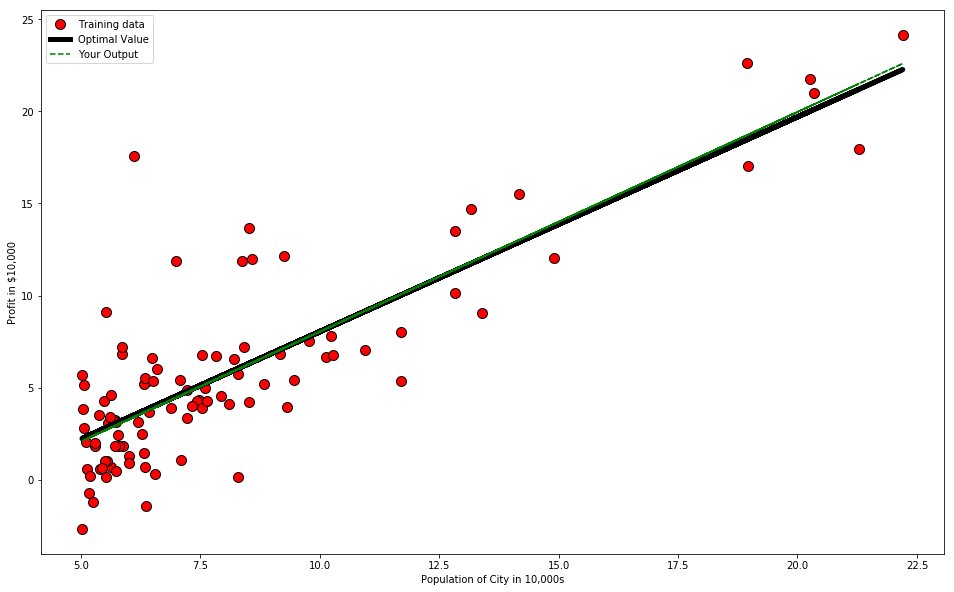

In [14]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, [-3.6303, 1.1664]), '-', c='black', linewidth=5)
pyplot.plot(X[:, 1], np.dot(X, theta), '--', c='green')
pyplot.legend(['Training data', 'Optimal Value', 'Your Output']);

# You can try adding futher details to your graph.
# After that, do post your final graph on the group! 
# Save it as a .png file [you can use inbuilt pyplot functions].
# Also try adding grid lines and other stuff!

We will use your final parameters to plot the linear fit. The results should look like the following figure.

![](Figures/regression_result.png)

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

<div class="alert alert-block alert-success">
Note the way that the following lines use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in `numpy`.
</div>

<div class="alert alert-block alert-success">
Note that the first argument to the `numpy` function `dot` is a python list. `numpy` can internally converts **valid** python lists to numpy arrays when explicitly provided as arguments to `numpy` functions.
</div>


In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 2798.37

For population = 70,000, we predict a profit of 44554.55



### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:

![](Figures/cost_function.png)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

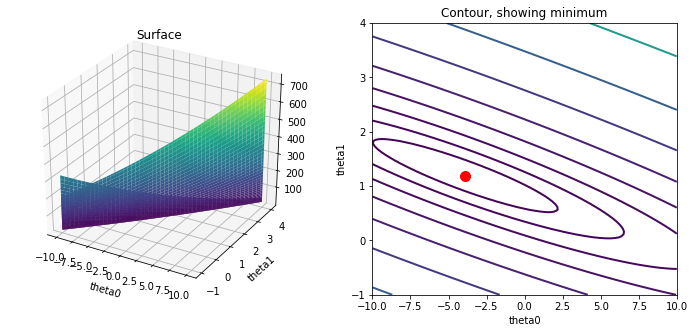

In [16]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

## Optional Exercises

If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. 

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [17]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [18]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
  

    # =========================== YOUR CODE HERE =====================
    n=X.shape[1]
    m=X.shape[0]
    for i in range(n):
        temp=np.mean(X[0:m,i])
        mu[i]=temp
        temp=np.std(X[0:m,i])
        sigma[i]=temp
    for i in range(m):
        X_norm[i][0]-=mu[0]
        X_norm[i][1]-=mu[1]
        X_norm[i]/=sigma

        
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [19]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [20]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [10]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    print(X.T)
    # ======================= YOUR CODE HERE ===========================
    
    

    
    # ==================================================================
    return J


In [61]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    print(X.T)

    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Optional exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

In [ ]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = 0   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

<a id="section7"></a>
### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [ ]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [ ]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================

    
    # =================================================================
    return theta

Optional: Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [ ]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = 0 # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))